In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

ModuleNotFoundError: No module named 'numpy'

In [276]:
#load the dataset into a dataframe

df = pd.read_csv('hra.csv')



In [277]:
#dropping irrelevant features which don't contribute anything to the model
df1 =  df

df = df.drop(['EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'MonthlyRate', 'Over18', 'StandardHours'], axis=1)

In [292]:
#creating input and target variables
X = df.drop(['Attrition'], axis=1)
y=df['Attrition']
y= y.map({'No': 1, 'Yes': 0}).astype(int)

X.head(), y.head()

(   Age     BusinessTravel  DailyRate              Department  \
 0   41      Travel_Rarely       1102                   Sales   
 1   49  Travel_Frequently        279  Research & Development   
 2   37      Travel_Rarely       1373  Research & Development   
 3   33  Travel_Frequently       1392  Research & Development   
 4   27      Travel_Rarely        591  Research & Development   
 
    DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
 0                 1          2  Life Sciences                        2   
 1                 8          1  Life Sciences                        3   
 2                 2          2          Other                        4   
 3                 3          4  Life Sciences                        4   
 4                 2          1        Medical                        1   
 
    Gender  JobInvolvement  ...  PerformanceRating RelationshipSatisfaction  \
 0  Female               3  ...                  3                        1  

In [279]:
from sklearn.preprocessing import LabelEncoder #for transcoding columns with textual values
le = LabelEncoder()

In [280]:
#splitting dataset into training and testing parts
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 39)

In [281]:
#encoding those columns with textual values
encoder = ['Gender', 'BusinessTravel','Department', 'JobRole','MaritalStatus','OverTime', 'EducationField']

for i in encoder:
    X_train[i]= le.fit_transform(X_train[i])
    X_test[i] = le.transform(X_test[i])
    df1[i]=le.fit_transform(df[i])
    
df1['Attrition']=le.fit_transform(df['Attrition'])
df1 = df1.drop(['EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'MonthlyRate', 'Over18', 'StandardHours'], axis=1)


<AxesSubplot:>

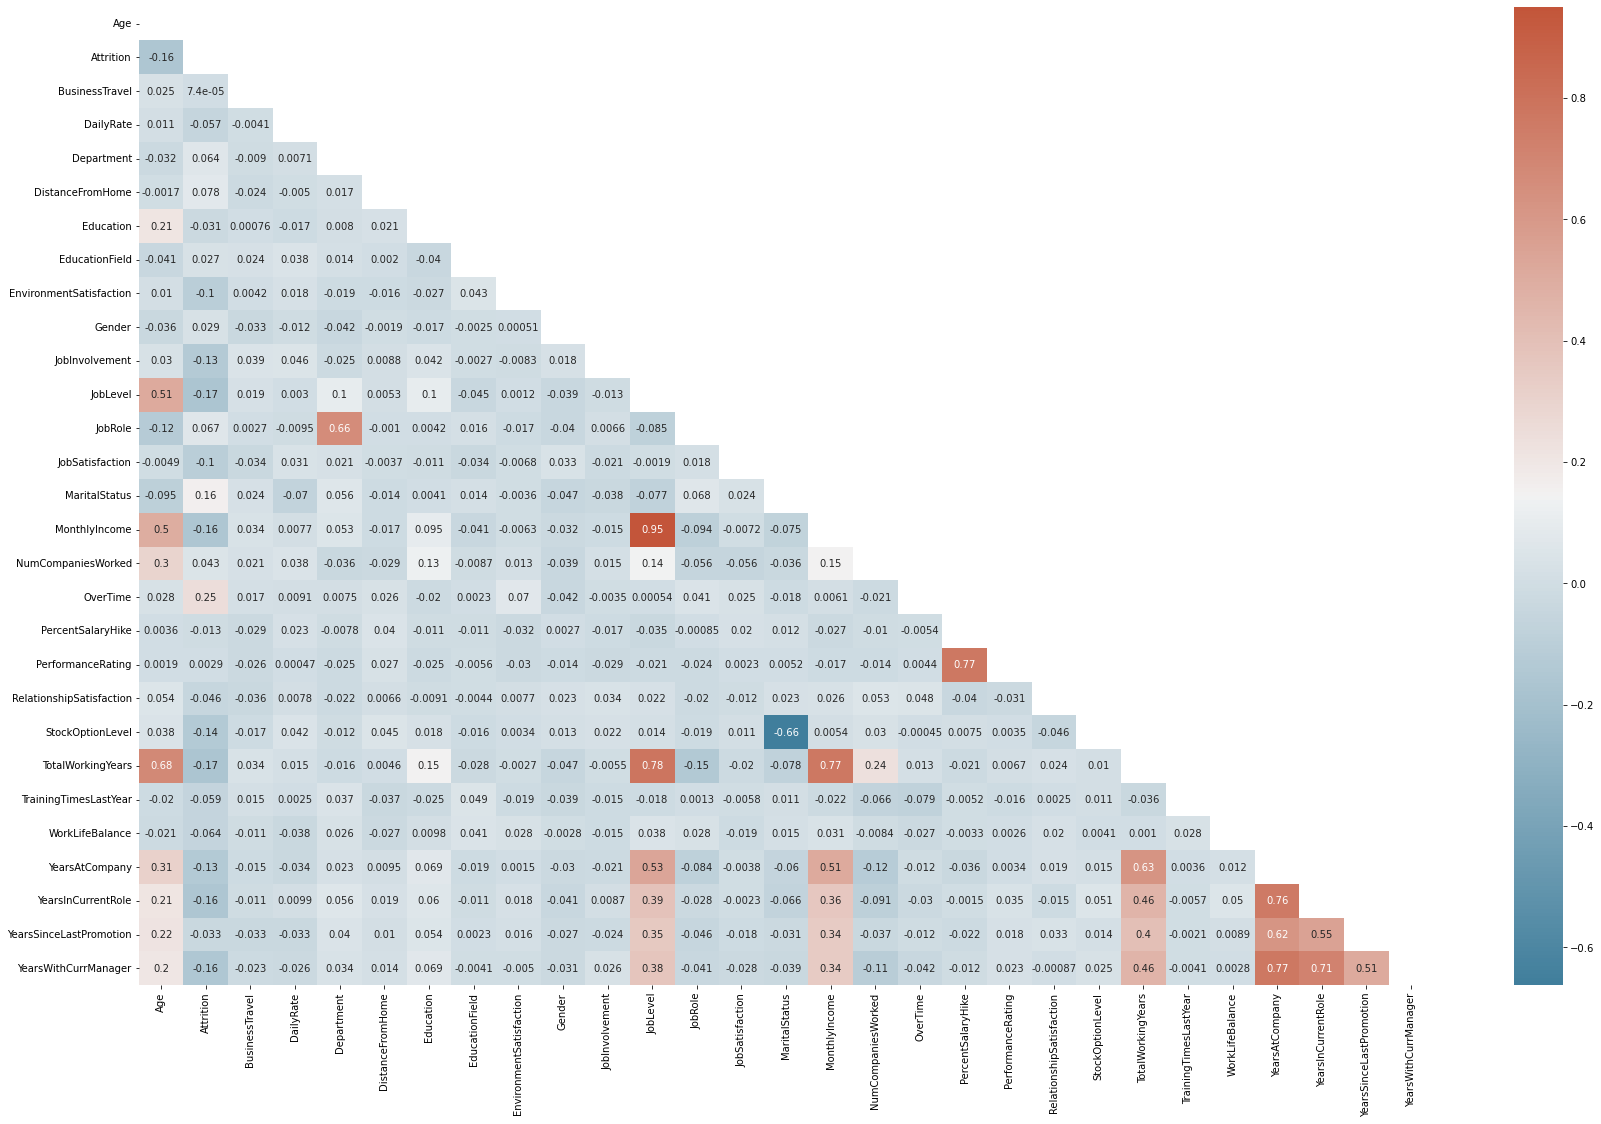

In [282]:
# plotting correlation heatmap
corr=df1.corr()
f, ax = plt.subplots(figsize=(29, 18))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [283]:
X_test

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
657,29,2,1086,1,7,1,3,1,0,2,...,3,3,3,8,5,3,4,3,0,3
1070,28,1,467,2,7,3,1,3,1,3,...,3,4,0,5,5,3,4,2,1,3
787,55,1,1091,1,2,1,1,4,1,3,...,3,2,1,23,4,3,3,2,1,2
444,48,2,163,2,2,5,2,2,0,3,...,3,1,1,14,2,3,9,7,6,7
1042,44,0,981,1,5,3,1,3,1,2,...,3,4,0,7,5,3,5,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,58,1,781,1,2,1,1,4,1,2,...,3,4,1,3,3,2,1,0,0,0
325,31,1,798,1,7,2,1,3,0,2,...,4,1,1,10,2,3,10,9,8,9
436,33,2,587,1,10,1,3,1,1,1,...,3,1,3,8,2,3,4,3,1,3
876,20,2,654,2,21,3,2,3,1,4,...,3,4,0,2,2,3,2,1,2,2


In [284]:
from sklearn.preprocessing import StandardScaler

In [285]:
#standardizing the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [286]:
X_train.shape, X_test.shape

((1176, 28), (294, 28))

In [287]:
from sklearn.ensemble import RandomForestClassifier

In [288]:
#training the model
clf = RandomForestClassifier(n_estimators = 4, random_state=0)
clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=4, random_state=0)

In [289]:
#testing the model
y_pred = clf.predict(X_test)

array([[ 16,  32],
       [ 30, 216]], dtype=int64)

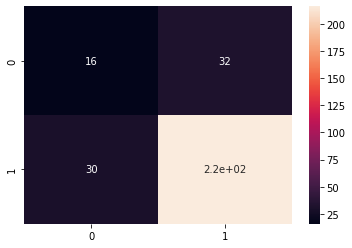

In [290]:
#confusion matrix for the test results
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)
cm

In [291]:
#evaluating the model

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# recall_average = recall_score(y_test, y_pred, average="binary", pos_label="No")
# precision_average = precision_score(y_test, y_pred, average="binary", pos_label="No")

print('Model accuracy score index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Model precision score index: {0:0.4f}'. format(precision_score(y_test, y_pred)))
print('Model recall score index: {0:0.4f}'. format(recall_score(y_test, y_pred)))

Model accuracy score index: 0.7891
Model precision score index: 0.8710
Model recall score index: 0.8780
